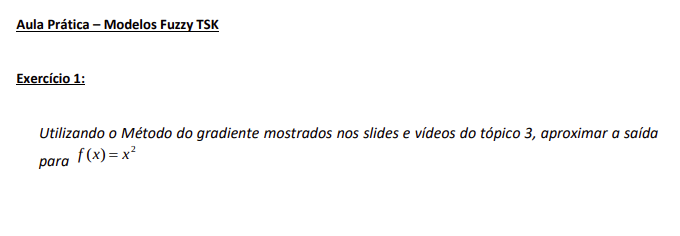

#### A solução exige uso de gaussianas. 
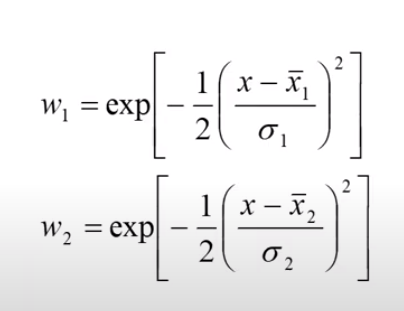

In [8]:
def doGaussian(x, mean, sd ):
  w = (x - mean)/ sd
  w =  w**2
  w =  -0.5*w
  w =  math.exp(w)
  return w

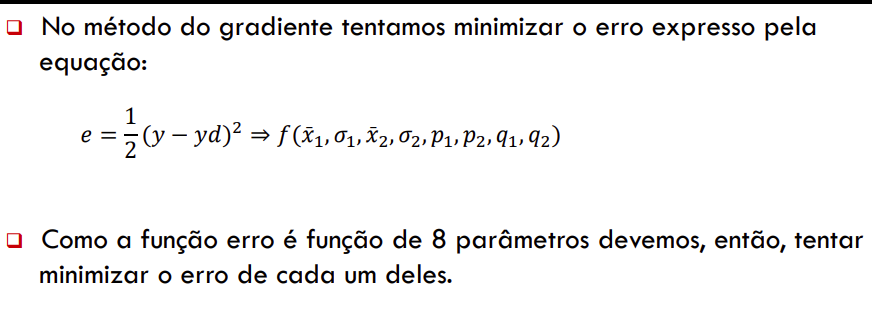

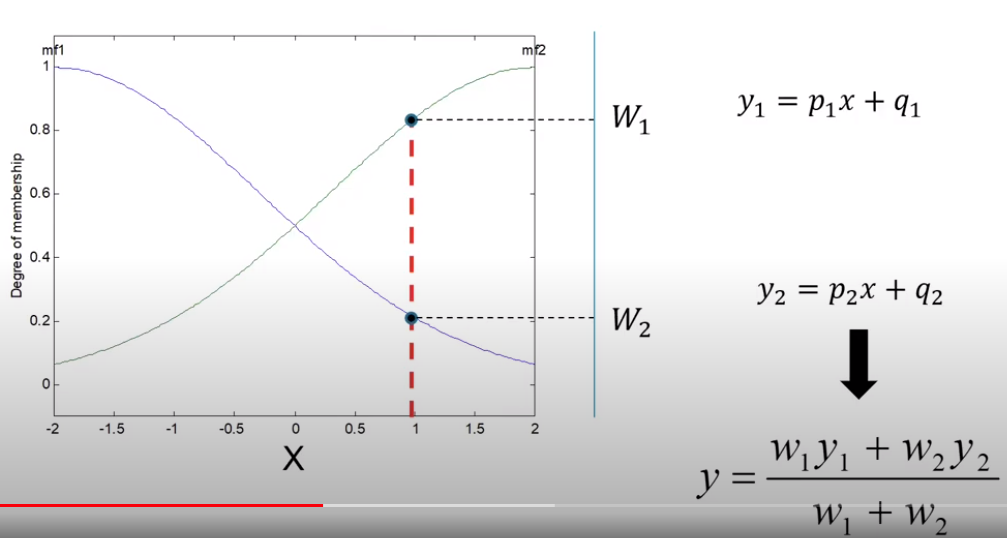

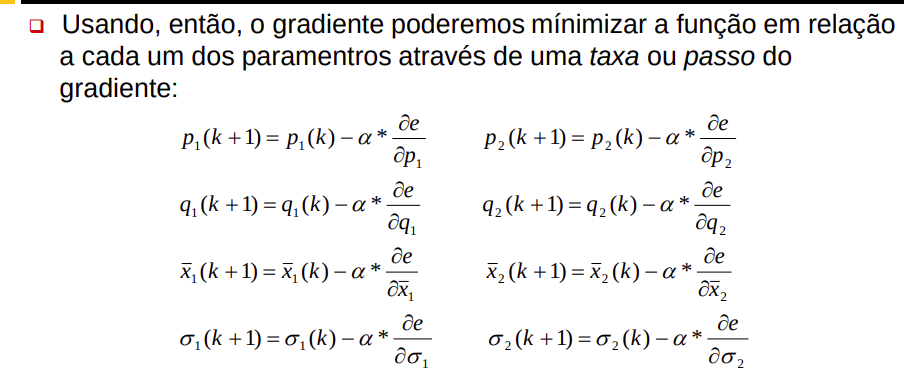

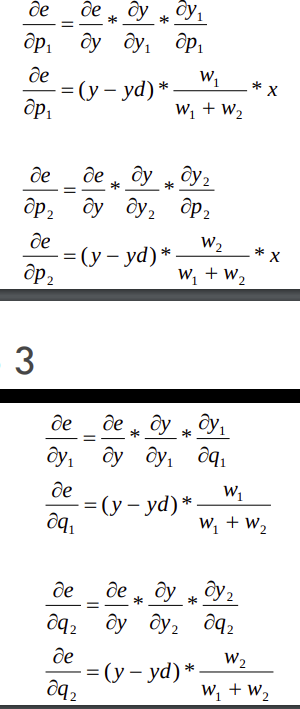


### Derivada do erro em relação aos parâmetros

In [ ]:

def Dp1(y, yd, w1, w2,x):
    return (y-yd) * x * w1 / (w1 + w2)

def Dp2(y, yd, w1, w2,x):
    return (y-yd) * x * w2 / (w1 + w2)

def Dpy1(y, yd, w1, w2,x):
  ######  return (y-yd) * x * w2 / (w1 + w2)

def Dpq1(y, yd, w1, w2,x):
    return (y-yd) * w1 / (w1 + w2)

def Dpq2(y, yd, w1, w2,x):
    return (y-yd) * w2 / (w1 + w2)

def Dpx1(y, yd, w1, w2, x, y1, y2, mean, sd):
    return (y-yd) * w2 * ((y1 - y2)/(w1 + w2)**2) * w1 *((x - mean)/sd**2)

def Dpx2(y, yd, w1, w2, x, y1, y2, mean, sd):
    return (y-yd) * w1 * ((y2 - y1)/(w1 + w2)**2) * w2 *((x - mean)/sd**2)


0.9415100656348764


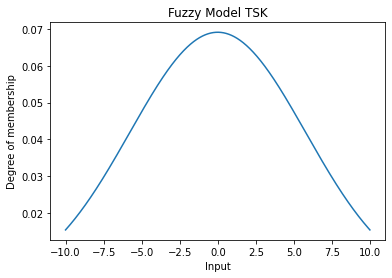

In [30]:
import math   # This will import math module
import numpy as np #https://www.geeksforgeeks.org/how-to-plot-a-normal-distribution-with-matplotlib-in-python/
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

  
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.01)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
   
print(doGaussian(2,mean,sd))         
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))   

plt.title("Fuzzy Model TSK")
plt.xlabel("Input")
plt.ylabel("Degree of membership")


plt.show()

In [34]:
x=5
def deDp1():
    print(x)
    
deDp1()

5
